# Experiment 4

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.models import Sequential
from random import randint

In [48]:
# setup and train test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
# making a copy before flattening for the next code segment which display images
x_train_drawing = x_train

print("X_Train:", x_train[0])
print("y_Train:", y_train[0])

X_Train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [50]:
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

In [51]:
print("After reshaping") 
print("X_Train Shape:", x_train.shape) 
print("x_test Shape:", x_test.shape)

After reshaping
X_Train Shape: (60000, 784)
x_test Shape: (10000, 784)


In [52]:
# convert class vector to binary class matrices
num_classes = 10 
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
print("After reshaping")
print("Y_Train Shape:", y_train.shape) 
print("y_test Shape:", y_test.shape)
print("y_Train:", y_train[0])

After reshaping
Y_Train Shape: (60000, 10)
y_test Shape: (10000, 10)
y_Train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


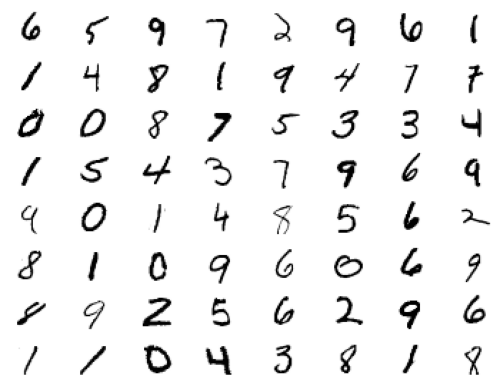

In [54]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## Layer with 25 neurons

In [55]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Input(shape=(image_size,)))
model.add(Dense(units=25, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,885 (77.68 KB)

 Trainable params: 19,885 (77.68 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.4592 - loss: 1.7942 - val_accuracy: 0.7923 - val_loss: 1.1121
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.7915 - loss: 1.0787 - val_accuracy: 0.8610 - val_loss: 0.8022
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.8410 - loss: 0.8247 - val_accuracy: 0.8792 - val_loss: 0.6509
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8642 - loss: 0.6844 - val_accuracy: 0.8942 - val_loss: 0.5704
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8751 - loss: 0.6086 - val_accuracy: 0.8973 - val_loss: 0.5025
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.8811 - loss: 0.5482 - val_accuracy: 0.9023 - val_loss: 0.4625
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8847 - loss: 0.5087 - val_accuracy: 0.9105 - val_loss: 0.4227
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8911 - loss: 0

In [57]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)

print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9190 - loss: 0.2744
Loss: 0.2382948249578476
Accuracy: 0.9319000244140625


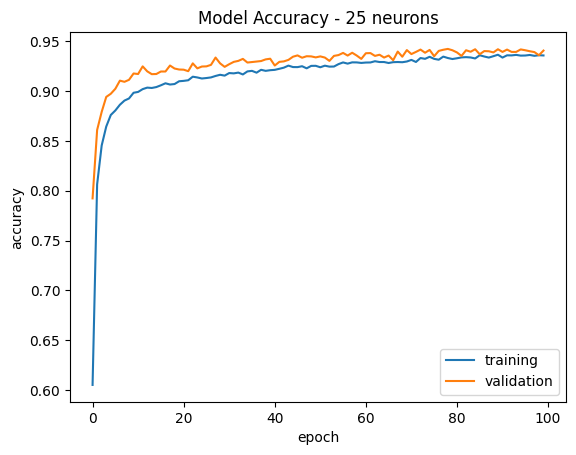

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy - 25 neurons')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

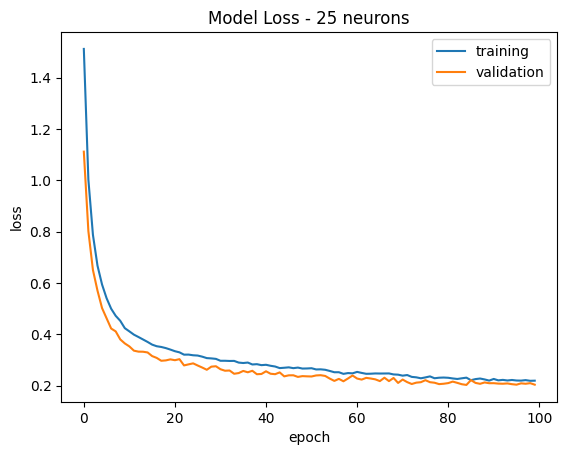

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss - 25 neurons')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## Layer with 50 neurons

In [60]:
model_50 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model_50.add(Input(shape=(image_size,)))
model_50.add(Dense(units=50, activation='sigmoid'))
model_50.add(Dense(units=num_classes, activation='softmax'))
model_50.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model_50.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_50.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5174 - loss: 1.6217 - val_accuracy: 0.8502 - val_loss: 0.7621
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.8369 - loss: 0.7528 - val_accuracy: 0.8902 - val_loss: 0.5417
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8694 - loss: 0.5778 - val_accuracy: 0.9043 - val_loss: 0.4467
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8862 - loss: 0.4891 - val_accuracy: 0.9120 - val_loss: 0.3914
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8966 - loss: 0.4361 - val_accuracy: 0.9155 - val_loss: 0.3586
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8999 - loss: 0.4056 - val_accuracy: 0.9208 - val_loss: 0.3332
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9032 - loss: 0.3860 - val_accuracy: 0.9257 - val_loss: 0.3169
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.9058 - loss: 0.3

In [62]:
loss, accuracy = model_50.evaluate(x_test, y_test, verbose=True)

print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.9436 - loss: 0.1922
Loss: 0.1707967221736908
Accuracy: 0.9517999887466431


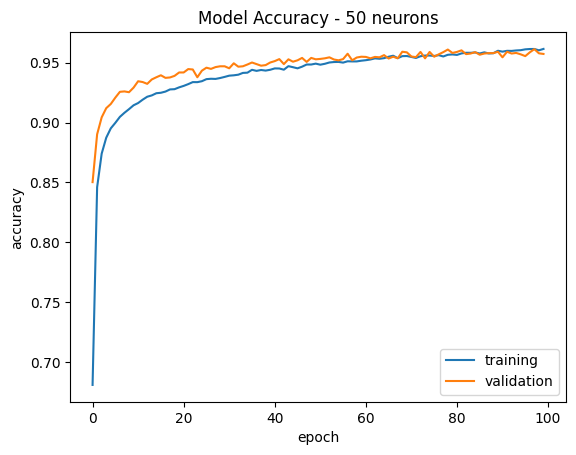

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy - 50 neurons')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

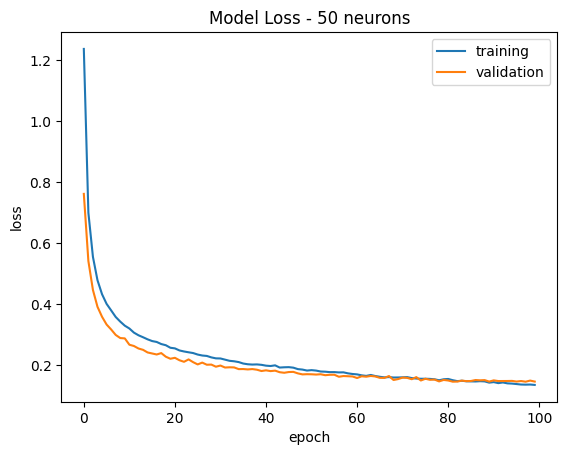

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss - 50 neurons')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## Layer with 100 neurons

In [65]:
model_100 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model_100.add(Input(shape=(image_size,)))
model_100.add(Dense(units=100, activation='sigmoid'))
model_100.add(Dense(units=num_classes, activation='softmax'))
model_100.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model_100.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_100.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5592 - loss: 1.5194 - val_accuracy: 0.8675 - val_loss: 0.6296
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8572 - loss: 0.6296 - val_accuracy: 0.8942 - val_loss: 0.4461
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8835 - loss: 0.4823 - val_accuracy: 0.9128 - val_loss: 0.3680
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8964 - loss: 0.4133 - val_accuracy: 0.9223 - val_loss: 0.3258
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9061 - loss: 0.3743 - val_accuracy: 0.9252 - val_loss: 0.2996
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9147 - loss: 0.3325 - val_accuracy: 0.9312 - val_loss: 0.2762
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.9158 - loss: 0.3238 - val_accuracy: 0.9345 - val_loss: 0.2596
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.9200 - loss: 0.3012 - va

In [67]:
loss, accuracy = model_100.evaluate(x_test, y_test, verbose=True)

print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9497 - loss: 0.1592
Loss: 0.1380266696214676
Accuracy: 0.958299994468689


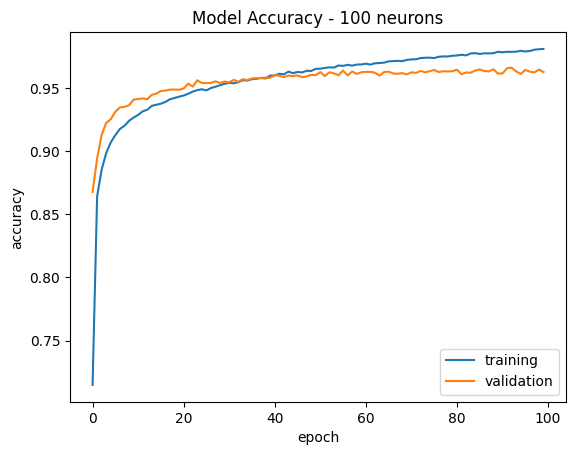

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy - 100 neurons')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

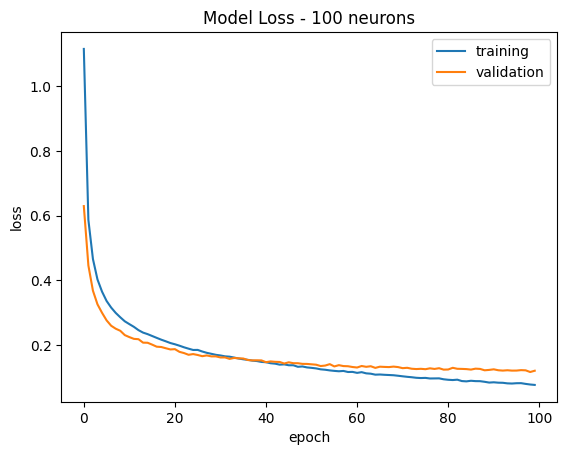

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss - 100 neurons')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## Layer with 200 neurons

In [70]:
model_200 = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model_200.add(Input(shape=(image_size,)))
model_200.add(Dense(units=200, activation='sigmoid'))
model_200.add(Dense(units=num_classes, activation='softmax'))
model_200.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,010 (621.13 KB)

 Trainable params: 159,010 (621.13 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_200.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_200.fit(x_train, y_train, batch_size=128, epochs=100, verbose=True, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6153 - loss: 1.3423 - val_accuracy: 0.8947 - val_loss: 0.4920
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8717 - loss: 0.5146 - val_accuracy: 0.9147 - val_loss: 0.3559
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8955 - loss: 0.4038 - val_accuracy: 0.9268 - val_loss: 0.2975
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9104 - loss: 0.3384 - val_accuracy: 0.9307 - val_loss: 0.2719
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9188 - loss: 0.3076 - val_accuracy: 0.9363 - val_loss: 0.2468
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9234 - loss: 0.2822 - val_accuracy: 0.9393 - val_loss: 0.2336
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9274 - loss: 0.2684 - val_accuracy: 0.9403 - val_loss: 0.2198
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9340 - loss: 0.2456 - val_accu

In [72]:
loss, accuracy = model_200.evaluate(x_test, y_test, verbose=True)

print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.9552 - loss: 0.1456
Loss: 0.12457428872585297
Accuracy: 0.9613000154495239


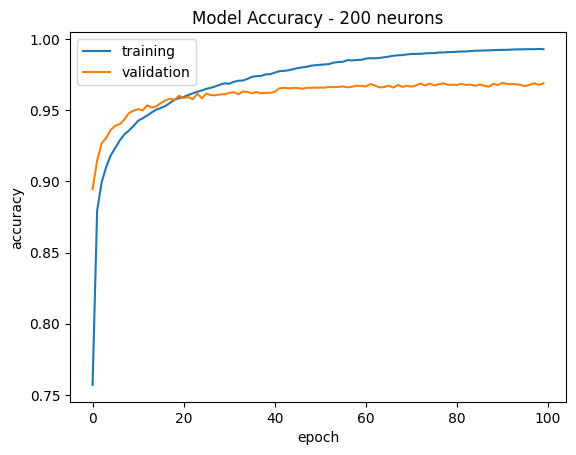

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy - 200 neurons')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

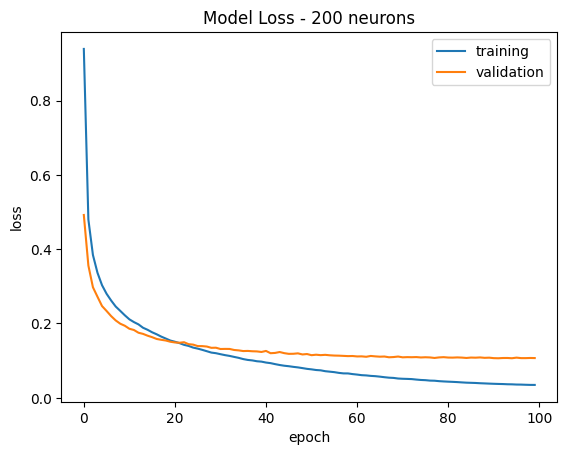

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss - 200 neurons')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()